![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_2/Session_2_Logistic_Regression_EXERCISE.ipynb)

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set()

In [69]:
url = 'https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_2/banking.csv'
data = pd.read_csv(url)
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [70]:
data.shape

(41188, 21)

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [71]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [72]:
data.education[data.education.str.contains('basic')] = 'basic'
data.education.unique()

C:\Users\Philip Harman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

##### Analyse the distribution of the target variable

C:\Users\Philip Harman\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


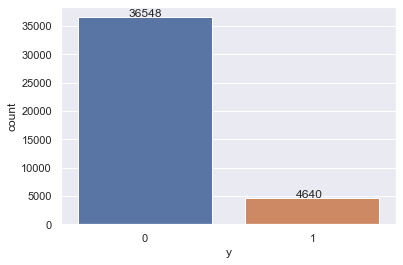

In [73]:
ax = sns.countplot(data.y)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [74]:
target_summary = pd.DataFrame({'Count' : data.y.value_counts(), 'Pct' : data.y.value_counts(normalize = True)*100})
target_summary

,Count,Pct
0,36548,88.734583
1,4640,11.265417


##### What can we observe about the distribution of the target variable

The majority of clients (~89%) have NOT subscribed to a term deposit.

##### Observe how the different numeric variables behave for the 2 classes

In [75]:
# Put your code here
num_vars = ['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx',
               'cons_conf_idx','euribor3m','nr_employed']
data[num_vars].groupby(data.y).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [76]:
print('Average pdays grouped by target variable.\nExcluding 999 values (where client was never contacted) ')
pd.DataFrame(data.pdays[data.pdays != 999].groupby(data.y).mean())

Average pdays grouped by target variable.
Excluding 999 values (where client was never contacted) 


,pdays
y,
0,6.193431
1,5.913133


Observations of Numeric variable trends associated with subscriptions:
- Longer [duration] of last contact. Makes sense - more time on the phone suggests interest and allows greater opportunity to pursuade customer.
- Fewer [campaign] contacts. Surprising, would expect the opposite.
- Fewer [pdays] since last contact. However, as shown above, this difference is less pronounced after removing instances where pdays = 999 (i.e. where client was not previously contacted)
- Higher avg. number of [previous] contacts
- Lower avg. [emp_var_rate]
- Lower avg. [euribor3m]

##### Analyse other variables - Make some plots and discuss them

In [77]:
# A function to plot Subcription (y/n) volume/frequency for the chosen variable
def lil_plachty(param):
    param_ct = pd.DataFrame(data.y.groupby(data[param])
                            .value_counts()).unstack().sort_values(('y', 1), ascending = False)
    param_pct = pd.DataFrame(data.y.groupby(data[param])
                             .value_counts(normalize = True)).unstack().sort_values(('y', 1), ascending = False)
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(13,5)
    param_ct.plot(kind = 'bar', ax = ax1)
    ax1.legend([0,1], loc = 'center right')
    ax1.set_title('Subscription volume by ' + str(param))
    
    param_pct.plot(kind = 'bar', ax = ax2)
    ax2.legend([0,1], loc = 'center right')
    ax2.set_title('Subscription frequency by ' + str(param))
    

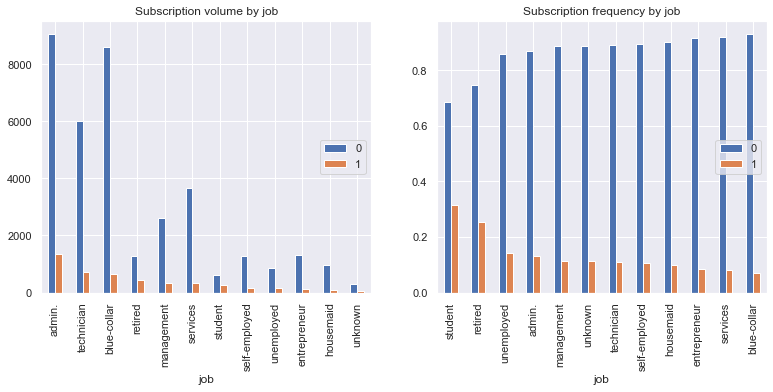

In [78]:
lil_plachty('job')

#### Job type/status
- Admin, techicians, and blue collar workers are the top three by *Subscription volume*
- Students, retired, and unemployed people are the top three by *Subscription rate*

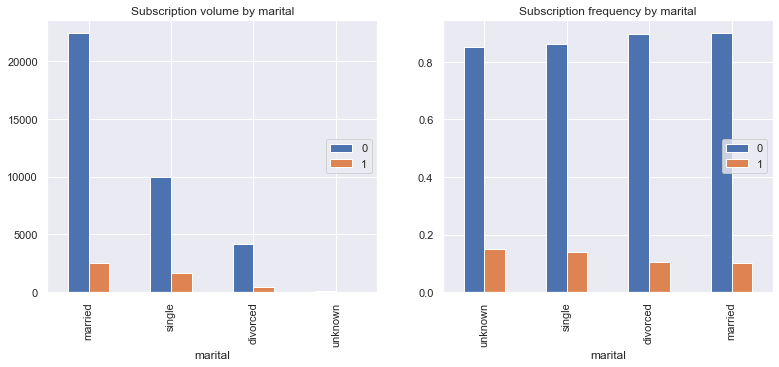

In [79]:
lil_plachty('marital')

#### Marital status
- Married and Single make up most of the *Subscription volume*
- Single/unknown have the highest *Subscription frequency*, although the difference is small.

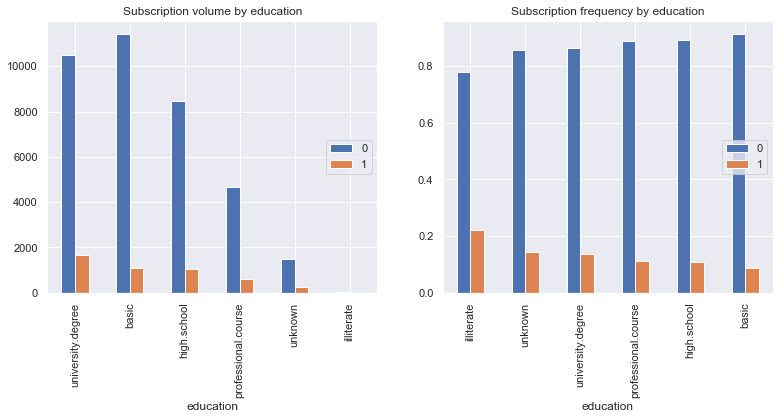

In [80]:
lil_plachty('education')

#### Education
- University degrees Subscribe the highest volume, followed by "basic" and then "high-school".
- Highest rates are among illiterate/unknown education status. From there, rates descend with education level obtained (although the difference between these categories is small)

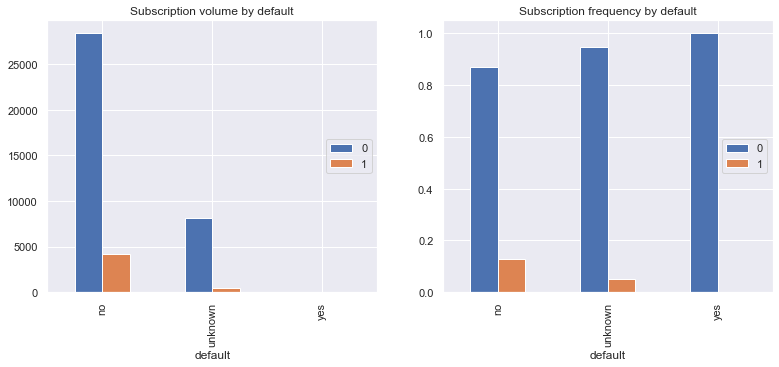

In [81]:
lil_plachty('default')

#### Default
- Highest volume and frequency for individuals w/o credit in default (default = no)

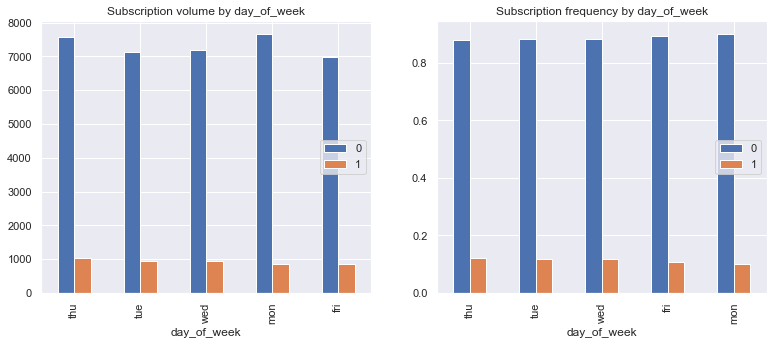

In [82]:
lil_plachty('day_of_week')

#### Day of week
- Middle of week (Tues/Wed/Thur) have the highest Subscription rate *and* volume, but differences are minor.
- NOTE: Will drop day of week. Does not appear to have much effect.

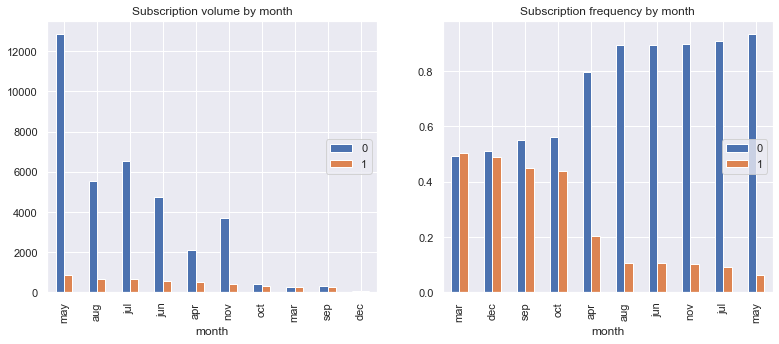

In [83]:
lil_plachty('month')

#### Month
- Highest volume occurs during the spring/summer months. However, frequency is low in these same months.

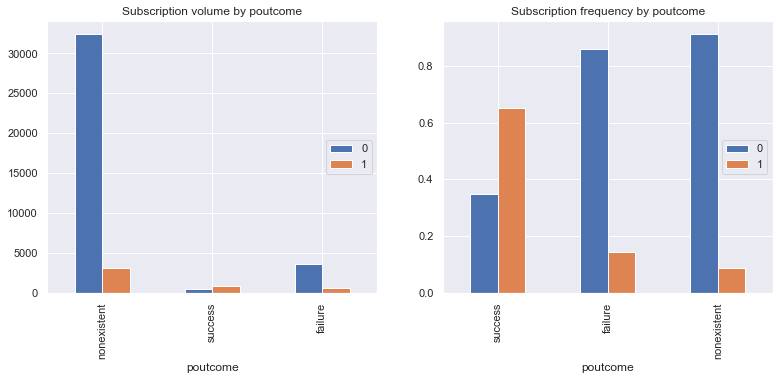

In [84]:
lil_plachty('poutcome')

#### Poutcome
- A previously successful marketing campaign leads to a very high frequency of subscriptions; however, this volume is very low. 
- The majority of volume occurs when a previous marketing campaign was nonexistent (but the frequency in this category is very low).

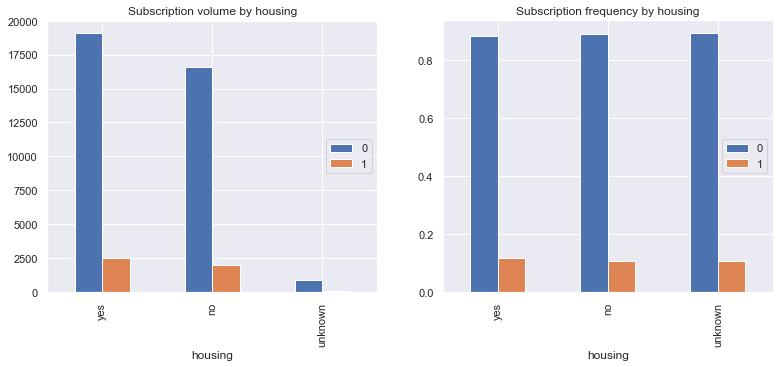

In [85]:
lil_plachty('housing')

#### Housing
- Housing loan appears to have little to no effect

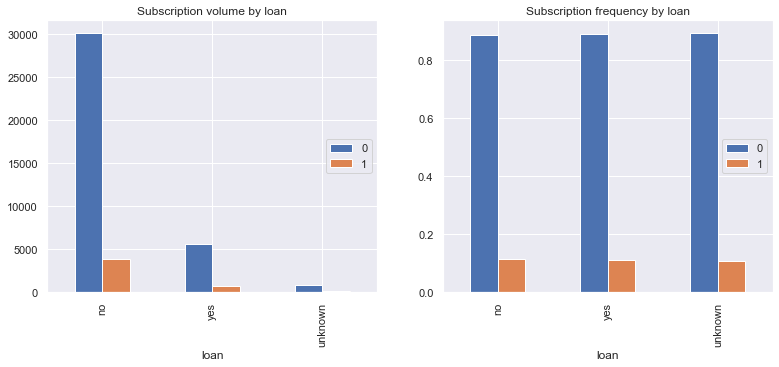

In [86]:
lil_plachty('loan')

#### Loan
- Loan appears to have little to no effect.

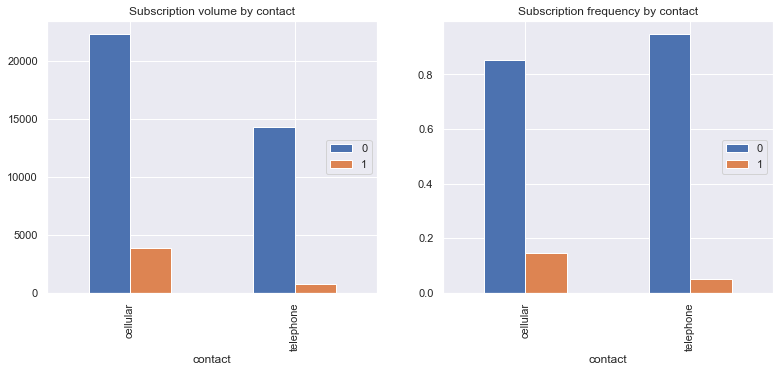

In [87]:
lil_plachty('contact')

### Create dummy variables

In [88]:
data2 = pd.get_dummies(data, drop_first = False)
data2

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


### Implement the Logistic Regression Model

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

##### Prepare the dataset for training

In [91]:
x = data2.drop(columns = 'y')
y = data2.y

# Split training and test - test size: 30% random state = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Create an instance of the model 
logmodel = LogisticRegression()

#Fit the model
logmodel.fit(x_train,y_train)

C:\Users\Philip Harman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [92]:
y_pred = logmodel.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91


##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET


In [93]:
print("Percentage of Non-Subscribed Clients:", int(len(data2[data2.y == 0])/len(data2)*100), '%')

Percentage of Non-Subscribed Clients: 88 %


This dataset is imbalanced because 88% of customers are not subscribed (y=0 for 88% of clients). So, even if the model predicted y=0 every time, it would still have 88% accuracy. This also means that the score of 91% accuracy doesn't really guarantee the model works that well. This is an example of the Accuracy Paradox.


The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

In [94]:
#Compute the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[10698,   283],
       [  797,   579]], dtype=int64)

**Is our model obtaining good results or is it failing in some specific case?**

The model's biggest issue seems to be false negatives. There are many cases (814) where the model is predicting Y = 0 (client not subscribed) where the client actually was subscribed. This may be due to the imbalanced dataset & the high volume of non-subscribed customers in the dataset.

False positves are also an issue, but to a slightly smaller extent.


##### Compute other metrics using classification report

In [95]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10981
           1       0.67      0.42      0.52      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

In [96]:
562/(562+264) #Precision@1

0.6803874092009685

In [97]:
562/(814+562) #Recall@1

0.40843023255813954

## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

As noted above, 88% of clients in this dataset are not subscribed. For this reason, the model will develop a bias towards "not subscribed" (y=0) because it can do so while still having a high accuracy score.

##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

In [98]:
x = data2.loc[:, data2.columns != 'y']
y = data2.loc[:, data2.columns == 'y']

##### Apply SMOTE to generate synthetic data

In [99]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
columns = X_train.columns

# Apply oversampling ONLY ON training data
os_data_X, os_data_y= os.fit_resample(X_train,y_train)

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [162]:
count_summary = pd.DataFrame({'Count' : os_data_y.y.value_counts(), 'Pct' : os_data_y.y.value_counts(normalize = True)*100})
count_summary

,Count,Pct
1,25567,50.0
0,25567,50.0


They are prefectly distributed!!

##### Implement the model

In [167]:
# Prepare thedata qith the oversampled dataset
#x , y = os.fit_resample(data2.loc[:, data2.columns != 'y'], data2.loc[:, data2.columns == 'y'])
x, y = os_data_X, os_data_y 

# Create training and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Create an instance of the model 
logreg = LogisticRegression()

#Fit the model
logreg.fit(X_train,y_train)

C:\Users\Philip Harman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Philip Harman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [168]:
#Compute predictions
y_pred = logreg.predict(X_test)

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [169]:
# Confusion Matrix
metrics.confusion_matrix(y_test, y_pred)

array([[6428, 1099],
       [ 796, 7018]], dtype=int64)

Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [170]:
#classification_report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7527
           1       0.86      0.90      0.88      7814

    accuracy                           0.88     15341
   macro avg       0.88      0.88      0.88     15341
weighted avg       0.88      0.88      0.88     15341



The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

The oversampled (i.e. balanced) dataset provides much higher precision and recal, even though the accuracy is lower. This indicates that the new model is performing better.

In [171]:
# Pickle this model and deploy a web app with Streamlit + Heroku
# Export model
filename = 'logreg_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [172]:
weights = pd.DataFrame(zip(X_train.columns,(logreg.coef_[0])))
weights.sort_values(by = [1]).head(60)

,0,1
5,emp_var_rate,-0.352191
8,euribor3m,-0.327470
49,month_may,-0.251796
2,campaign,-0.228240
23,marital_married,-0.194241
26,education_basic,-0.177953
37,housing_yes,-0.172478
35,housing_no,-0.172477
11,job_blue-collar,-0.151660
42,contact_telephone,-0.146656
